# HW2 Regression

#### X and Y are given by professor

In [1]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y = [0.002, 0.015, 0.02, 0.08, 0.2, 0.35, 0.75, 1]

Nonlinear regression function $$y=\alpha x^{\beta}$$

Take the $log$ of nonlinear regression function 
$$\log y=\log \alpha+\beta \log x$$
Let $x\prime$ denote $\log x$, $y\prime$ denote $\log y$
$$y\prime=\log \alpha + \beta x\prime$$
Let $a$ denote log$\alpha$
$$y\prime = a+bx \prime$$
So we transfer the non-linear regression function to a simple linear regression function.

Here are the transformations
$$\log y => y\prime$$
$$\log x => x\prime$$
$$\alpha => \log a$$
$$\beta => b$$

Thus, in the new function, we use y'(logy) and x'(logx) instead of y and x. After the calculation, we can get the a and b, then, we transfer the a, b to alpha and beta to get the accurate value for our nonlinear regression. 

In [2]:
import math
import matplotlib.pyplot as plt
from typing import List

Vector = List[float]

In [3]:
def simpleRegression(x: Vector, y: Vector):
    """Obtain the alpha and beta"""
    
    def mean(xs: Vector) -> float:
        """Calculate the average"""
        return sum(xs)/len(xs)

    def de_mean(xs: Vector) -> Vector:
        """Calculate the difference between x and the average of xs"""
        Mx = mean(xs)
        return [x - Mx for x in xs]

    def vector_multi(xs: Vector, ys: Vector) -> Vector:
        """Multiply corresponding elements"""
        assert len(xs) == len(ys), 'vectors must be the same length'

        return [xs_i * ys_i for xs_i, ys_i in zip(xs, ys)]

    def getLog(xs: Vector) -> Vector:
        """Take log of the elements with a base of 10"""
        return [math.log(x, 10) for x in xs]
    
    logX = getLog(x)
    logY = getLog(y)
    
    
    b = (sum(vector_multi(de_mean(logX),de_mean(logY)))) / (sum(vector_multi(de_mean(logX), de_mean(logX))))
    a = mean(logY) - b * mean(logX)
    beta = b
    alpha = 10 ** a
    
    return alpha, beta

In [4]:
alpha, beta = simpleRegression(x, y)
print("alpha=", alpha)
print("beta=", beta)

alpha= 1.629422276430365
beta= 3.0328268960283373


In [5]:
def drawGraph(alpha: float, beta: float):
    """Draw a graph"""
    def graphFunc(X: float, alpha: float, beta: float) -> float:
        """Our designated regression function = alpha * x^beta"""
        return alpha * (X ** beta)
    
    xs = [x / 10.0 for x in range(10)]
    plt.plot(x, y, 'bo', label = "Source data")
    plt.plot(xs, [graphFunc(x, alpha, beta) for x in xs], 'r-', 
             label='Regression: alpha:%5.3f, beta:%5.3f' % simpleRegression(x, y))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

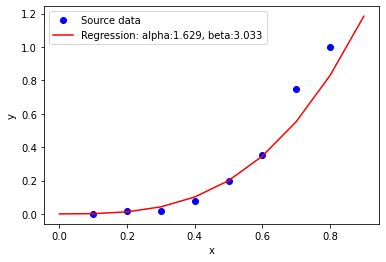

In [6]:
alpha, beta = simpleRegression(x,y)
drawGraph(alpha, beta)